# Machine Learning Workshop

<div style="text-align: justify"> 
For this workshop, we are going to explore a really interesting dataset. That is the London Airbnb listings dataset. The data was scraped from the Airbnb site and is publicly available at [Inside Airbnb](http://insideairbnb.com/about.html). This dataset contains "publicly available information about a city's Airbnb's listings, Inside Airbnb provides filters and key metrics so you can see how Airbnb is being used to compete with the residential housing market".<br><br>

We are going to analyze this data interactively using a Python Jupyter notebook. This allows us a better interaction and visualization experience of the dataset. Before doing that, we need to configure your workspace first. There are two options: manually configure the environment or install a pre-configured python distribution such as [Anaconda](https://www.anaconda.com/download/). For this post, we used python version 2.7 so it would be best if you use that version as well. <br><br>

In the following image, we can see the available rooms in the city. The red dots represent entire house/apartments, the green dots represent private rooms and the blue dots shared rooms. At the moment the data was scrapped the total number of listings was 49,348 so nowadays the total number will be somewhat different.
</div>

![title](resources/london.png)

## 1. Package Requirements

<div style="text-align: justify"> 
Additionally, we need to check if we have installed the required python libraries necessary to run the notebook. If you installed the anaconda distribution, you probably already have most of the packages already installed. If not, you can use pip to install them.
</div>

### 1.1 Default Python Environment

```
jupyter ~=1.0.0
jupyterthemes ~=0.18.0
numpy ~=1.12.1
pandas ~=0.20.1
scikit-learn ~=0.18.1
seaborn ~=0.8 ```

### 1.2 Anaconda Distribution Environment

```
python ~=2.7.13
jupyterthemes ~=0.18.0
lesscpy ~=0.12.0
seaborn ~=0.8```

### 1.3 Importing the Packages to your Notebook

<div style="text-align: justify">
We need to import the necessary packages to use them through the notebook. We are going to import libraries for data manipulation, visualization, validation, etc. Among the most useful packages are pandas (For data manipulation), matplotlib (Matlab style plots) and sklearn (Model training and validation). We are going to use them plenty, so let's get to it!
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Utilities Libraries
import string
import re
from collections import defaultdict

# Sklearn ML Algorithms
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn import preprocessing

# Some libraries configuration options
pd.set_option("max_columns", None)
plt.rcParams["figure.figsize"] = [10,8]

<div style="text-align: justify">
Furthermore, we are going to use the jupyterthemes styling capabilities to make our graphics more visually appealing.
</div>

In [3]:
# Jupyter notebook themes

# import jtplot module in notebook
from jupyterthemes import jtplot

jtplot.style(theme='chesterish')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

## 1. Importing the initial dataset

<div style="text-align: justify">
The dataset is available [here](http://insideairbnb.com/get-the-data.html) (Search for London). The data is formated as a csv file which is really simple to import into our Jupyter notebook using the pandas library. Since this dataset will occupy more memory than the pandas default setting. We must specify an argument to override the pandas low memory setting.
</div>

In [5]:
listings = pd.read_csv("../data/listings.csv", low_memory=False)

<div style="text-align: justify">
Let's display some data rows to inspect the available features. We can do that using the python slicing notation. We are going to take the first three records and Jupyter will format them to fit nicely in our browser.
</div>

In [6]:
listings[:3]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,15896822,https://www.airbnb.com/rooms/15896822,20170304065726,2017-03-05,Double room in newly refurbished flat,"My place is close to TK Max, John Lewis, Marks...",NaN,"My place is close to TK Max, John Lewis, Marks...",none,NaN,NaN,NaN,NaN,NaN,- Keep clean and tidy. Be respectful to the ot...,https://a0.muscache.com/im/pictures/1d9cad1f-a...,https://a0.muscache.com/im/pictures/1d9cad1f-a...,https://a0.muscache.com/im/pictures/1d9cad1f-a...,https://a0.muscache.com/im/pictures/1d9cad1f-a...,69018624,https://www.airbnb.com/users/show/69018624,Dafina,2016-04-26,"London, England, United Kingdom",NaN,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/3aa93e9d-0...,https://a0.muscache.com/im/pictures/3aa93e9d-0...,RB of Kingston upon Thames,1.0,1.0,"['email', 'phone', 'facebook']",t,f,"A Thames Street, Kingston upon Thames, England...",RB of Kingston upon Thames,Kingston upon Thames,NaN,Kingston upon Thames,England,KT1 1PE,London,"Kingston upon Thames, United Kingdom",GB,United Kingdom,51.410036,-0.306323,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,Washer,""Smoke det...",NaN,$23.00,NaN,NaN,NaN,NaN,1,$8.00,7,1125,6 weeks ago,NaN,1,31,61,61,2017-03-05,1,2016-12-03,2016-12-03,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,flexible,f,f,1,0.32
1,4836957,https://www.airbnb.com/rooms/4836957,20170304065726,2017-03-05,Modern room 25m from Central London,This lovely spacious double bedroom is set in ...,////*** This Price include Parking but not Kit...,This lovely spacious double bedroom is set in ...,family,Kingston upon Thames is a vibrant Surrey marke...,Guests can in advance ask for any help they mi...,Transport: 10 mins walk to overground station...,Spacious living room with King size sofa bed+d...,We usually provide warm welcome to our guests...,No smoking No Pets Please ask before using an...,https://a0.muscache.com/im/pictures/61075138/4...,https://a0.muscache.com/im/pictures/61075138/4...,https://a0.muscache.com/im/pictures/61075138/4...,https://a0.muscache.com/im/pictures/61075138/4...,18154504,https://www.airbnb.com/users/show/18154504,Anas,2014-07-15,London,We are a professional working couple in our la...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/18154504/prof...,https://a0.muscache.com/im/users/18154504/prof...,RB of Kingston upon Thames,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"London Road, Kingston upon Thames, Greater Lon...",RB of Kingston upon Thames,Kingston upon Thames,NaN,Kingston upon Thames,Greater London,KT2 6QS,London,"Kingston upon Thames, Unite

## 2. Feature analysis 

Now, a really important step in Machine Learning is the feature analysis and feature engineering. This allows us to gain valuable insight from our data and identify the most important features to train our predictive model. First we must check which columns present the most null values. We must decide if they are worth keeping or not.

In [6]:
print "Total size of the Dataset: ", listings.shape
listings.apply(lambda x: sum(x.isnull()))

Total size of the Dataset:  (53904, 95)


id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
name                                    1
summary                              1446
space                               17627
description                            10
experiences_offered                     0
neighborhood_overview               22615
notes                               33285
transit                             21106
access                              22616
interaction                         24659
house_rules                         20530
thumbnail_url                        6854
medium_url                           6854
picture_url                             0
xl_picture_url                       6854
host_id                                 0
host_url                                0
host_name                               9
host_since                              9
host_location                     

<div style="text-align: justify">
Now we must select the columns that contain the features we will try to explore. It is recommended to use the features that have the least null values because dealing with the null values in the dataset can be really troublesome.
</div>

In [7]:
# We create an array with the features we want to keep.
selected_features = ['name', 'neighbourhood_cleansed', 'room_type', 'guests_included', 'minimum_nights',
                     'number_of_reviews', 'review_scores_rating', 'amenities', 'property_type',
                     'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price']
selected_listings = listings.copy()[selected_features]
selected_listings.rename(columns = {'neighbourhood_cleansed':'neighbourhood'}, inplace = True)
selected_listings[:2]

,name,neighbourhood,room_type,guests_included,minimum_nights,number_of_reviews,review_scores_rating,amenities,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,price
0,Double room in newly refurbished flat,Kingston upon Thames,Private room,1,7,1,100.0,"{""Wireless Internet"",Kitchen,Washer,""Smoke det...",Apartment,1,1.0,1.0,1.0,Real Bed,$23.00
1,Modern room 25m from Central London,Kingston upon Thames,Private room,1,1,15,91.0,"{TV,Internet,""Wireless Internet"",""Free parking...",Apartment,2,1.0,1.0,1.0,Pull-out Sofa,$50.00


So, let's verify that the features we selected do not have a majority of invalid values. You can use the same method that we used at the begining of the section.

In [8]:
print "Counting missing features values..."
selected_listings.apply(lambda x: sum(x.isnull()))

Counting missing features values...


name                        1
neighbourhood               0
room_type                   0
guests_included             0
minimum_nights              0
number_of_reviews           0
review_scores_rating    17262
amenities                   0
property_type               0
accommodates                0
bathrooms                 260
bedrooms                   93
beds                      173
bed_type                    0
price                       0
dtype: int64

Since the price is not in a purely numeric format. We need to remove the dolar sign at the start of the price, to use this feature in our model.

In [8]:
prices = selected_listings['price'].map(lambda p: int(p[1:-3].replace(",", "")))
selected_listings['price'] = prices
selected_listings['price'].describe()

count    53904.000000
mean        96.099622
std        117.641082
min          8.000000
25%         42.000000
50%         70.000000
75%        119.000000
max       7000.000000
Name: price, dtype: float64

<div style="text-align: justify">
Additionally to the price transformation, we displayed the statistic properties of the prices distribution using the built-in pandas method describe(). This method shows properties such as the mean, standard deviation, percentiles, etc. This information can provide some insight of the prices statistical distribution.
</div>

<div style="text-align: justify">
Now we are going to analize some of the features of the data to gain some insight about the price we are trying to model. The following graphic displays the swarmplot of a sample of the prices. This plot show a categorical scatterplot with non overlaping data points. This means that the graphic consist in selecting a random sample of prices and plotting them in the vertical axis, the horizontal axis indicates the quantity of non repeated prices that fall in the specific price range.
</div>

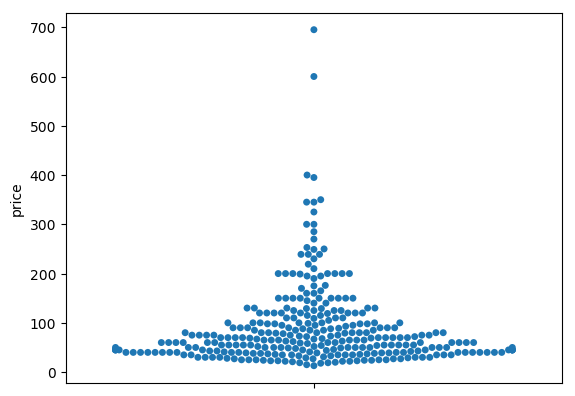

In [8]:
sns.swarmplot(y=prices.sample(300))
plt.show()

### 2.1 Exploring the relation between price and the features

We can use boxplots to measure the spread of the prices distribution across the different nighbourhoods. Since the neighbourhood has an intuitive relationship with the price of the room.

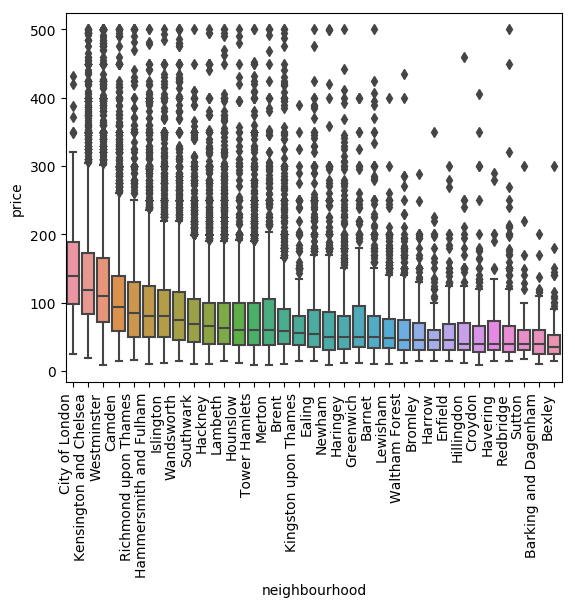

In [11]:
price_neighbourhood = selected_listings.query('price <= 500')\
                    .groupby('neighbourhood')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
                
data = selected_listings.query('price <= 500')

sns.boxplot(y=data['price'], x=data['neighbourhood'], order=price_neighbourhood)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

<div style="text-align: justify">
The box plot of the price and the neighbourhood is really interesting since it allows to clearly see the prices distribution according to the neighbourhood. From this graph, we can determine which are the most affordable neighbourhoods and the most exclusive ones. Also since the neighbourhoods split the prices distributions in a consistent way, this could mean that this feature will be of importance to the model.
</div>

<div style="text-align: justify">
In the same way. We can analyze the spread of the prices distribution according to other features, like the room type. This help us to determine the features that split the data in the best way to achieve a decent predictive model. In the following snippet, we generate a boxplot of the prices in relation to the __room_type__ categories.
</div>

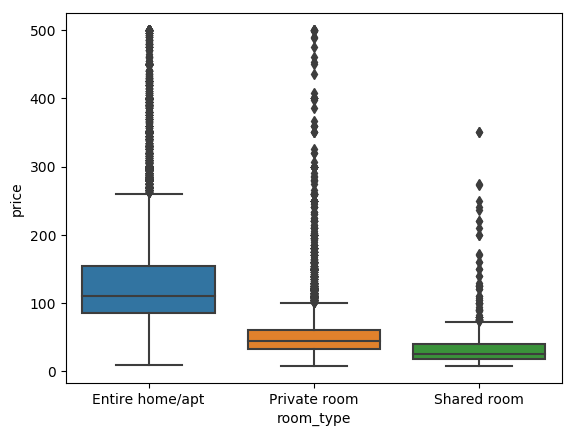

In [83]:
room_price = selected_listings.query('price <= 500')\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
                
data = selected_listings.query('price <= 500')

sns.boxplot(y=data['price'], x=data['room_type'], order=room_price)
plt.show()

<div style="text-align: justify">
Another interesting observation comes from the room_type / price box plot. We can see that is considerably more expensive to rent an entire home or apartment compared to renting a private room or shared room. However, the difference in prices between private and shared rooms is not that much, so one could consider a private room most of the time.
</div>

<div style="text-align: justify">
In addition to the previous features we are also going to explore the amenities feature, the amenities could be a differentiator factor. So, in order to start working with this feature, we must extract the information first. For this task, regular expressions come in handy. First, we remove the curly braces from the amenities JSON like string. Then we remove the amenities that start with _translation_ because this amenities are not properly translated and are not usable in this context.
</div>

In [9]:
%%time
regex = r"{([^}]*)}"
regex2 = r"translation.\w\D+.."
listings_cp = selected_listings.copy()
listings_cp['amenities'] = listings_cp['amenities'].map(lambda amns: re.search(regex, amns).group(1))
listings_cp['amenities'] = listings_cp['amenities'].map(lambda amns: re.sub(regex2, '', amns))
listings_cp['amenities'] = listings_cp['amenities'].map(lambda amns: amns.replace("\"", ""))

CPU times: user 388 ms, sys: 24 ms, total: 412 ms
Wall time: 395 ms


<div style="text-align: justify">
Now we must represent this list of amenities in a column-like format in order to use them as predictors in the regression algorithm. We can easily achieve this using pandas built-in function **get_dummies**. This method returns the one hot encoding of the list of amenities, this encoding represents the absence or presence of an amenity as a zero or one in a column. However, we are not going to add this newly engineered feature to the dataset just yet, because for this workshop is more practical to work with features that are available easily.
</div>

In [13]:
# The code for adding the amenities colums is currently commented for practicality
amenity_ohe = listings_cp.amenities.str.get_dummies(sep = ",")
amenities_cols = amenity_ohe.columns.values
# dataset = pd.concat([listings_cp, amenity_ohe], axis=1)
dataset = listings_cp.query('price <= 500')
dataset = dataset.drop('amenities', axis=1)
dataset = dataset.drop('name', axis=1)

### 2.2 Handling null values

<div style="text-align: justify">
Since there are still empty values in some columns of our data. We must find a way to deal with this missing data. One option is to simply drop the column that presents the null values or drop the rows with the empty values. This dataset does not contain a lot of records, so we can't afford to lose much information. So, a technique for handling null values in continuos numeric features is replacing the null values with the median of the values for that feature. 
Replacing the missing values with the median of the feature's values allows keeping the information while it does not affect greatly the statistical distribution of the feature.
</div>

In [14]:
# The numeric features that present null values are: review_scores_rating, bathrooms, bedrooms
# and beds
dataset['review_scores_rating'] = dataset['review_scores_rating'].fillna(dataset['review_scores_rating'].median())
dataset['bathrooms'] = dataset['bathrooms'].fillna(dataset['bathrooms'].median())
dataset['bedrooms'] = dataset['bedrooms'].fillna(dataset['bedrooms'].median())
dataset['beds'] = dataset['beds'].fillna(dataset['beds'].median())

In [16]:
# Displaying the top amenities
print "Displaying amenities count..."
amenity_ohe[amenities_cols].apply(lambda x: sum(x == 1)).sort_values(ascending=False)

Displaying amenities count...


Wireless Internet             50980
Heating                       50648
Kitchen                       49553
Essentials                    45165
Washer                        44839
Smoke detector                41835
TV                            35863
Internet                      32610
Hangers                       32475
Iron                          31839
Shampoo                       30836
Family/kid friendly           28707
Hair dryer                    28554
Laptop friendly workspace     25890
Carbon monoxide detector      24807
Dryer                         23136
First aid kit                 15331
Buzzer/wireless intercom      14895
Fire extinguisher             14171
Elevator in building          12426
Free parking on premises      12400
24-hour check-in              12098
Cable TV                      10719
Breakfast                      8271
Lock on bedroom door           6834
Safety card                    6485
Indoor fireplace               4854
Smoking allowed             

### 2.3 Encoding Categorical Features

<div style="text-align: justify">
To start working with machine learning algorithms we need to find a way to represent non-numeric features (i.e. Categorical features such as __room_type__ or __neighbourhood__) in a numeric format that an algorithm could "understand". This is called **feature encoding** and allows us to do exactly that. There are a lot of encoding techniques but we are going to use one of the simplest, that is **Label Encoding** and it simply transforms a category label to an integer value and stores that representation on a map. 
</div>

In [17]:
%%time
# Instantiate the LabelEncoder as a default dictionary to handle several columns at once
d = defaultdict(preprocessing.LabelEncoder)
cat_columns = ['neighbourhood', 'room_type', 'property_type', 'bed_type']
encoded_dataset = dataset.apply(
    lambda x: d[x.name].fit_transform(x) if x.name in cat_columns else x)

CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 145 ms


<div style="text-align: justify">
Now if we display some rows of the dataset, we can notice that now every feature is numeric. We did that using the previous cell code, that allowed us to encode the string labels of the feature to numeric correspondent equivalent. So, we are able to use this dataset with a machine learning algorithm to run our predictions.
</div>

In [18]:
encoded_dataset.head()

,neighbourhood,room_type,guests_included,minimum_nights,number_of_reviews,review_scores_rating,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,price
0,20,1,1,7,1,100.0,0,1,1.0,1.0,1.0,4,23
1,20,1,1,1,15,91.0,0,2,1.0,1.0,1.0,3,50
2,20,1,1,1,2,80.0,0,2,1.0,1.0,1.0,4,24
3,20,1,1,2,0,94.0,14,2,1.5,1.0,1.0,4,50
4,20,1,1,1,0,94.0,14,1,1.0,1.0,1.0,4,25


## 3. Spliting the dataset into Training, Validation and Testing

<div style="text-align: justify">
In this section, we are going to split our current dataset into three different datasets. This with the purpose of correctly train and validate our predictive model. The first dataset is the training dataset which allows us to train a regression model based on the data available in this dataset. Second, we have the validation dataset, which is a subset extracted from the training dataset and it is used for tuning the parameters of the model with reduced overfitting risk (since we are not tuning based on the training data). Finally, we have the testing dataset, likewise the validation dataset. It contains data the model have not seen and is used to validate the accuracy of the model on unseen data, the testing score of our model is the ground truth of how good it is.
</div>

In [20]:
training_dataset, testing = train_test_split(encoded_dataset, test_size=0.1, random_state=8)
training, validation = train_test_split(training_dataset, test_size=0.2, random_state=8)


print "Dataset Size: ", encoded_dataset.shape
print "Training Dataset Size: ", training.shape
print "Validation Dataset Size: ", validation.shape
print "Testing Dataset Size: ", testing.shape

Dataset Size:  (53594, 13)
Training Dataset Size:  (38587, 13)
Validation Dataset Size:  (9647, 13)
Testing Dataset Size:  (5360, 13)


## 4. Methods for model Training and Validation

<div style="text-align: justify">
We now have the datasets we need to start training our model, but first we need to define some helper methods we are going to need for the model training and validation. You don't need to understand each line of code, you just need to know what the function does.<br><br>
</div>

* __fit_model__: This function takes as arguments and isntance of the regression algorithm you choose (from the sklearn available regression algorithms), the training and validation dataset and some default parameters. This function trains the model and predicts the validation dataset to calculate and display the model accuracy using other helper methods.<br><br>

* __model_report__: This function takes the predictions from the trained model and prints the score and metrics for the model. The displayed metrics include the mean absolute error, root mean square error and R2 score, for both the training and validation predictions.<br><br>

* __evaluate_cross_validation__: This method runs an statistic cross-validation using the K-Fold technique for evaluating the training accuracy of the model and avoid overfitting.<br><br>

* __grid_search__: This function allows to search exaustively the best parameters to reduce the error of the model. This method trains the model with every posible combination from a parameter dictionary and return the parameters that reduce the error the most. However, we only use this since the dataset is really small. It is recommended to use __RandomSearch__ since is way faster and it usually finds parameters within the same accuracy of the __GridSearch__.<br><br>


In [21]:
def fit_model(model, training, validation, cross_val=False, cv_folds=5):
    predictors = [x for x in training.columns if x not in ['price']]
    model.fit(training[predictors], training['price'])
    #Predict values:
    training_predictions = model.predict(training[predictors])
    validation_predictions = model.predict(validation[predictors])
    model_report(training, validation, training_predictions, validation_predictions)

    if cross_val:
        evaluate_cross_validation(model, training, cv_folds)

def model_report(training, validation, training_predictions, validation_predictions):
    #Print model report:
    print "\nModel Report"
    print "Training"
    print "Mean Absolute Error : %.4g" % mean_absolute_error(training['price'].values, training_predictions)
    print "Root Mean Squared Error : %.4g" % np.sqrt(mean_squared_error(training['price'].values, training_predictions))
    print "R2 Score: %4f" % r2_score(training['price'].values, training_predictions)
    print "\n"
    print "Validation"
    print "Mean Absolute Error : %.4g" % mean_absolute_error(validation['price'].values, validation_predictions)
    print "Root Mean Squared Error : %.4g" % np.sqrt(mean_squared_error(validation['price'].values, validation_predictions))
    print "R2 Score: %4f" % r2_score(validation['price'].values, validation_predictions)
    
def evaluate_cross_validation(model, training, K):
    predictors = [x for x in training.columns if x not in ['price']]
    cv = KFold(n_splits=K, shuffle=True, random_state=2)
    scores = cross_val_score(model, training[predictors], training['price'], cv=cv)
    print ""
    print(scores)
    print("Mean score: {0:.3f} (+/-{1:.3f})".format(scores.mean(), scores.std()))
    
def grid_search(model, param_grid, training, validation, cv):
    predictors = [x for x in training.columns if x not in ['price']]
    grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", n_jobs=2, cv=cv)
    grid_result = grid_search.fit(training[predictors], training['price'])

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    validation_predictions = grid_result.predict(validation[predictors])

    print "Validation"
    print "Mean Absolute Error : %.4g" % mean_absolute_error(validation['price'].values, validation_predictions)
    print "Root Mean Squared Error : %.4g" % np.sqrt(mean_squared_error(validation['price'].values, validation_predictions))
    print "R2 Score: %4f" % r2_score(validation['price'].values, validation_predictions)

## 5. Model Training

### 5.1 Baseline Model

<div style="text-align: justify">
With the helper methods implemented it is time to start training our model. We are going to use the __DecisionTree__ regression algorithm since this is a well-known algorithm and allows to make human understandable decisions. Since we need a reference point to the later parameter tuning, we are going to train the model with the default parameters without optimizing anything. This will serve as our baseline model to compare when we optimize the parameters.
</div>

In [22]:
%%time
predictors = [x for x in training.columns if x not in ['price']]
decision_tree = DecisionTreeRegressor(random_state=8)
fit_model(decision_tree, training, validation, cross_val=True)


Model Report
Training
Mean Absolute Error : 4.958
Root Mean Squared Error : 15.83
R2 Score: 0.948473


Validation
Mean Absolute Error : 34.46
Root Mean Squared Error : 56.69
R2 Score: 0.362835

[ 0.31224009  0.31760144  0.31410616  0.33396205  0.3357505 ]
Mean score: 0.323 (+/-0.010)
CPU times: user 828 ms, sys: 0 ns, total: 828 ms
Wall time: 826 ms


<div style="text-align: justify">
The decision tree algorithm allows to see the feature importance for the model. Let's check it to see if our observation actually were represented in the model.
</div>

In [23]:
#Create a series with feature importances:
feat_importance = pd.Series(decision_tree.feature_importances_, index=predictors).sort_values(ascending=False)
print(feat_importance)

bedrooms                0.409726
neighbourhood           0.101982
room_type               0.097030
bathrooms               0.094603
number_of_reviews       0.063219
minimum_nights          0.061639
accommodates            0.052179
review_scores_rating    0.045952
beds                    0.027474
guests_included         0.023312
property_type           0.020435
bed_type                0.002450
dtype: float64


<div style="text-align: justify">
We can see that the most important feature for the model is the number of bedrooms, followed by the neighbourhood and the room_type. The __room_type__ and the __neighbourhood__ are among the features we analyzed and they were indeed important for the model.
</div>

### 5.2 Finding the optimal parameters using Grid Search

<div style="text-align: justify">
Now with the baseline model trained we can move to the optimization of the model parameters using __GridSearch__, with decision trees, the parameters we can tune are: **max_depth** (Maximum tree depth), **max_features** (Maximum number of features to consider when spliting a node), **min_samples_leaf** (Minimum number of samples in a node to be considered a leaf, otherwise the tree keeps expanding the node). <br><br>

The grid search will try every combination of the parameters and with the result we can train a model with the optimal parameters that minimize the mean error.
</div>

In [31]:
%%time
# Tunning Parameters
max_depth = [5, 10, 15, 20]
max_features = ['log2', 'sqrt', 'auto']
min_samples_leaf = [10, 50, 70, 100]
param_grid = dict(max_depth=max_depth, max_features=max_features, 
                  min_samples_leaf=min_samples_leaf)
kfold = KFold(n_splits=5, shuffle=True, random_state=2)

grid_search(decision_tree, param_grid, training, validation, kfold)

Best: -1906.634051 using {'max_features': 'auto', 'max_depth': 20, 'min_samples_leaf': 50}
-2412.007212 (37.070562) with: {'max_features': 'log2', 'max_depth': 5, 'min_samples_leaf': 10}
-2415.111176 (41.787327) with: {'max_features': 'log2', 'max_depth': 5, 'min_samples_leaf': 50}
-2421.684311 (40.603313) with: {'max_features': 'log2', 'max_depth': 5, 'min_samples_leaf': 70}
-2432.668975 (34.135353) with: {'max_features': 'log2', 'max_depth': 5, 'min_samples_leaf': 100}
-2412.007212 (37.070562) with: {'max_features': 'sqrt', 'max_depth': 5, 'min_samples_leaf': 10}
-2415.111176 (41.787327) with: {'max_features': 'sqrt', 'max_depth': 5, 'min_samples_leaf': 50}
-2421.684311 (40.603313) with: {'max_features': 'sqrt', 'max_depth': 5, 'min_samples_leaf': 70}
-2432.668975 (34.135353) with: {'max_features': 'sqrt', 'max_depth': 5, 'min_samples_leaf': 100}
-2084.216944 (49.564256) with: {'max_features': 'auto', 'max_depth': 5, 'min_samples_leaf': 10}
-2078.209785 (48.150325) with: {'max_featur

Then we train the model using the parameters found by the gird search to train our final model

In [24]:
%%time
predictors = [x for x in training.columns if x not in ['price']]
decision_tree_optimal = DecisionTreeRegressor(max_depth=20, min_samples_leaf=50, random_state=8)
fit_model(decision_tree_optimal, training, validation, cross_val=True)


Model Report
Training
Mean Absolute Error : 26.03
Root Mean Squared Error : 41.86
R2 Score: 0.639836


Validation
Mean Absolute Error : 27.33
Root Mean Squared Error : 43.65
R2 Score: 0.622217

[ 0.62889959  0.60697183  0.59667169  0.5888787   0.6178956 ]
Mean score: 0.608 (+/-0.014)
CPU times: user 424 ms, sys: 4 ms, total: 428 ms
Wall time: 423 ms


<div style="text-align: justify">
Finally, we evaluate the accuracy of our model using the testing data. If our model is not overfitted, we can expect an accuracy close to the validation accuracy. In the following cell, we can see that indeed the model has almost the same accuracy in the validation dataset and the testing dataset. The mean error of the model is approximately 27 dolars which is a considerable error. But for the sake of simplicity let's assume the model is good enough to make reasonable predictions.
</div>

In [27]:
testing_predictions = decision_tree_optimal.predict(testing[predictors])
print "Testing Dataset Accuracy"
print "Mean Absolute Error : %.4g" % mean_absolute_error(testing['price'].values, testing_predictions)
print "Root Mean Squared Error : %.4g" % np.sqrt(mean_squared_error(testing['price'].values, testing_predictions))
print "R2 Score: %4f" % r2_score(testing['price'].values, testing_predictions)

Testing Dataset Accuracy
Mean Absolute Error : 27.11
Root Mean Squared Error : 43.27
R2 Score: 0.623719
